In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow_datasets as tfds
import tensorflow as tf

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')

for gpu in gpus:
    print("Name:", gpu.name, "  Type:", gpu.device_type)

tf.config.experimental.set_virtual_device_configuration(gpus[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2048)])

Name: /physical_device:GPU:0   Type: GPU


In [3]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string], '')
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

In [4]:
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True,
                          as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [5]:
encoder = info.features['text'].encoder

In [6]:
print ('Vocabulary size: {}'.format(encoder.vocab_size))

Vocabulary size: 8185


In [7]:
sample_string = 'Hello TensorFlow.'

encoded_string = encoder.encode(sample_string)
print ('Encoded string is {}'.format(encoded_string))

original_string = encoder.decode(encoded_string)
print ('The original string: "{}"'.format(original_string))

Encoded string is [4025, 222, 6307, 2327, 4043, 2120, 7975]
The original string: "Hello TensorFlow."


In [8]:
assert original_string == sample_string

In [9]:
for index in encoded_string:
  print ('{} ----> {}'.format(index, encoder.decode([index])))

4025 ----> Hell
222 ----> o 
6307 ----> Ten
2327 ----> sor
4043 ----> Fl
2120 ----> ow
7975 ----> .


In [10]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

In [11]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, train_dataset.output_shapes)

test_dataset = test_dataset.padded_batch(BATCH_SIZE, test_dataset.output_shapes)

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(encoder.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [13]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [14]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset, 
                    validation_steps=30)

Epoch 1/10
391/391 [==============================]934 - accuracy: 0.51 - 5s 2s/step - loss: 0.6932 - accuracy: 0.53 - 5s 2s/step - loss: 0.6933 - accuracy: 0.48 - 5s 1s/step - loss: 0.6932 - accuracy: 0.48 - 5s 1s/step - loss: 0.6933 - accuracy: 0.47 - 5s 887ms/step - loss: 0.6934 - accuracy: 0.463 - 5s 778ms/step - loss: 0.6934 - accuracy: 0.471 - 6s 696ms/step - loss: 0.6934 - accuracy: 0.466 - 6s 637ms/step - loss: 0.6933 - accuracy: 0.477 - 6s 585ms/step - loss: 0.6934 - accuracy: 0.467 - 6s 542ms/step - loss: 0.6934 - accuracy: 0.471 - 6s 506ms/step - loss: 0.6933 - accuracy: 0.480 - 6s 476ms/step - loss: 0.6933 - accuracy: 0.484 - 6s 450ms/step - loss: 0.6932 - accuracy: 0.493 - 6s 429ms/step - loss: 0.6932 - accuracy: 0.491 - 7s 412ms/step - loss: 0.6932 - accuracy: 0.487 - 7s 394ms/step - loss: 0.6932 - accuracy: 0.489 - 7s 377ms/step - loss: 0.6932 - accuracy: 0.490 - 7s 362ms/step - loss: 0.6932 - accuracy: 0.493 - 7s 350ms/step - loss: 0.6932 - accuracy: 0.494 - 7s 339ms/st

In [15]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

391/391 [==============================]0.3619 - accuracy: 0.859 - 0s 108ms/step - loss: 0.3461 - accuracy: 0.875 - 0s 84ms/step - loss: 0.3518 - accuracy: 0.859 - 0s 79ms/step - loss: 0.3626 - accuracy: 0.85 - 0s 79ms/step - loss: 0.3929 - accuracy: 0.86 - 0s 75ms/step - loss: 0.3944 - accuracy: 0.86 - 1s 74ms/step - loss: 0.4119 - accuracy: 0.86 - 1s 72ms/step - loss: 0.4570 - accuracy: 0.85 - 1s 71ms/step - loss: 0.4519 - accuracy: 0.85 - 1s 70ms/step - loss: 0.4543 - accuracy: 0.85 - 1s 69ms/step - loss: 0.4445 - accuracy: 0.85 - 1s 69ms/step - loss: 0.4353 - accuracy: 0.85 - 1s 68ms/step - loss: 0.4460 - accuracy: 0.85 - 1s 67ms/step - loss: 0.4372 - accuracy: 0.85 - 1s 67ms/step - loss: 0.4269 - accuracy: 0.85 - 1s 65ms/step - loss: 0.4205 - accuracy: 0.86 - 1s 64ms/step - loss: 0.4147 - accuracy: 0.86 - 1s 64ms/step - loss: 0.4092 - accuracy: 0.85 - 1s 64ms/step - loss: 0.4041 - accuracy: 0.86 - 1s 64ms/step - loss: 0.4117 - accuracy: 0.86 - 1s 64ms/step - loss: 0.4074 - accurac

In [16]:
def pad_to_size(vec, size):
  zeros = [0] * (size - len(vec))
  vec.extend(zeros)
  return vec

In [17]:
def sample_predict(sentence, pad):
  encoded_sample_pred_text = encoder.encode(sample_pred_text)

  if pad:
    encoded_sample_pred_text = pad_to_size(encoded_sample_pred_text, 64)
  encoded_sample_pred_text = tf.cast(encoded_sample_pred_text, tf.float32)
  predictions = model.predict(tf.expand_dims(encoded_sample_pred_text, 0))

  return (predictions)

In [18]:
# predict on a sample text without padding.

sample_pred_text = ('The movie was cool. The animation and the graphics '
                    'were out of this world. I would recommend this movie.')
predictions = sample_predict(sample_pred_text, pad=False)
print (predictions)


[[0.6354091]]


In [19]:
# predict on a sample text with padding

sample_pred_text = ('The movie was cool. The animation and the graphics '
                    'were out of this world. I would recommend this movie.')
predictions = sample_predict(sample_pred_text, pad=True)
print (predictions)

[[0.48369366]]


In [20]:
# predict on a sample text with padding

sample_pred_text = ('The movie was cool. The animation and the graphics '
                    'were out of this world. I would recommend this movie.')
predictions = sample_predict(sample_pred_text, pad=True)
print (predictions)

[[0.48369366]]


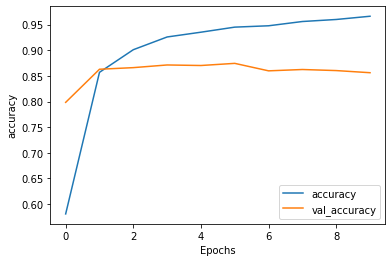

In [21]:
plot_graphs(history, 'accuracy')

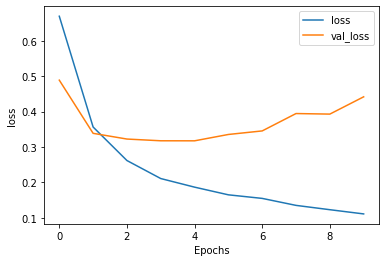

In [22]:
plot_graphs(history, 'loss')

In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(encoder.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [24]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

In [ ]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

In [ ]:
# predict on a sample text without padding.

sample_pred_text = ('The movie was not good. The animation and the graphics '
                    'were terrible. I would not recommend this movie.')
predictions = sample_predict(sample_pred_text, pad=False)
print (predictions)

In [ ]:
# predict on a sample text with padding

sample_pred_text = ('The movie was not good. The animation and the graphics '
                    'were terrible. I would not recommend this movie.')
predictions = sample_predict(sample_pred_text, pad=True)
print (predictions)

In [ ]:
plot_graphs(history, 'accuracy')

In [ ]:
plot_graphs(history, 'loss')